<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Colab-DogCat-CNN/blob/main/SinWaveTest_FrequencyRating2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料整理

In [2]:
#讀雲端資料存取方法
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [344]:
#Main路徑測試
print('主目錄')
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220715SinWaveTest
print('\n訓練集')
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220715SinWaveTest/train
print('\n測試集')
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220715SinWaveTest/test1

主目錄
SinWaveTest-FrequencyRating2.ipynb  test1  train

訓練集
Lv0.0.npy  Lv0.2.npy  Lv1.0.npy  Lv1.2.npy
Lv0.1.npy  Lv0.3.npy  Lv1.1.npy  Lv1.3.npy

測試集
T10.npy  T12.npy  T14.npy  T2.npy  T6.npy  T8.npy
T11.npy  T13.npy  T1.npy   T5.npy  T7.npy  T9.npy


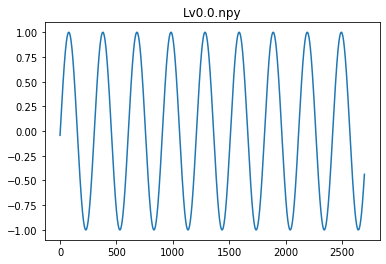

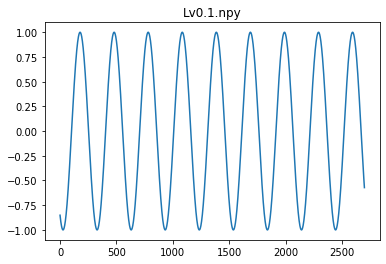

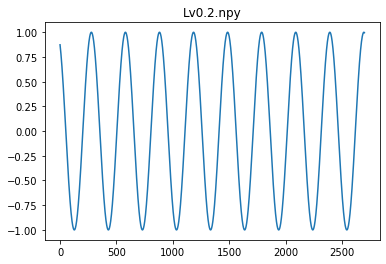

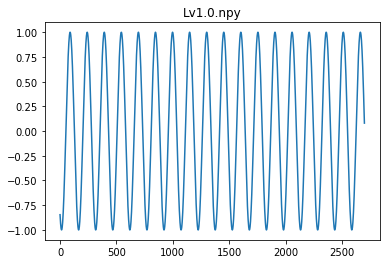

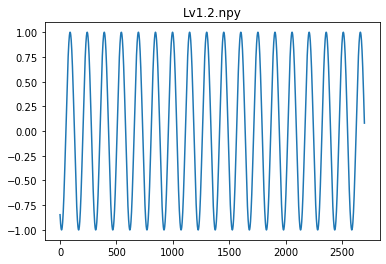

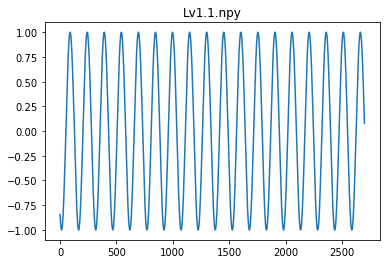

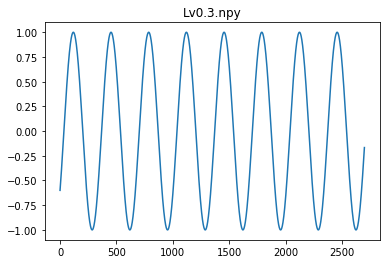

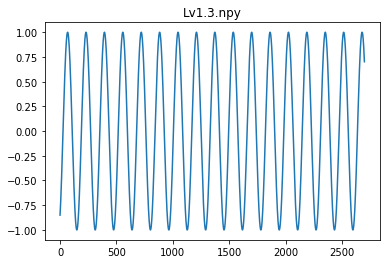

In [321]:
from numpy.lib.type_check import imag
#讀取訓練用資料
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220715SinWaveTest/train'
path = os.path.join(train_dir)
id_line = []
for p in os.listdir(path):
  id_line.append(p.split(".")[1])
  img = np.load(os.path.join(path,p))
  #print(img.shape)
  plt.plot(img.T)
  plt.title(p)
  plt.show()

# CNN-Conv1D訓練

In [320]:
#讀檔並標示訓練項目,採用2分法
import numpy as np
import cv2
import os

train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220715SinWaveTest/train'
path = os.path.join(train_dir)
X_train = []
y_train = []

def Lv_convert(get_category):#訓練陣列指引
  if get_category=='Lv0':
    return 0
  elif get_category=='Lv1':
    return 1

def create_train_data(path):#輸出訓練陣列
    for p in os.listdir(path):
        #print(os.path.join(path,p))
        category = p.split(".")[0]
        category = Lv_convert(category)
        img_array = np.load(os.path.join(path,p))
        #print(img_array)
        X_train.append(img_array)
        y_train.append(category)

create_train_data(path)
X_train = np.array(X_train).reshape(-1, 2700, 1)
y_train = np.array(y_train)
print('訓練資料集維度=',X_train.shape)
print('分類資料=',y_train)
#X_train = X_train/255.0

訓練資料集維度= (8, 2700, 1)
分類資料= [0 0 0 1 1 1 0 1]


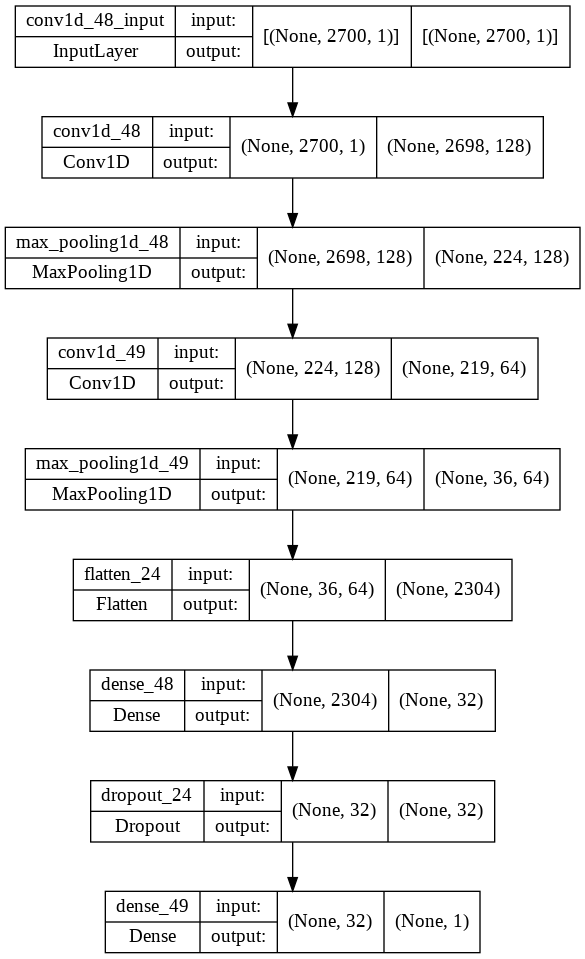

In [338]:
from tensorflow import keras
from tensorflow.keras import layers

CNN=keras.Sequential(name='SinWaveCNN')
CNN.add(layers.Conv1D(128,3,1,activation='relu',input_shape=(2700,1)))#第一層需有input_shape
CNN.add(layers.MaxPooling1D(pool_size=12))
CNN.add(layers.Conv1D(64,6,1,activation='relu'))
CNN.add(layers.MaxPooling1D(pool_size=6))
CNN.add(layers.Flatten())
CNN.add(layers.Dense(32,activation='relu'))
CNN.add(layers.Dropout(0.5))
#CNN.add(layers.Dense(2,activation='softmax'))#0~1(2 layer)
CNN.add(layers.Dense(1, activation='sigmoid'))

keras.utils.plot_model(CNN,show_shapes=True)

In [340]:
CNN.compile(optimizer='Adam',
      loss=keras.losses.binary_crossentropy,  #binary_crossentropy(二值用) or sparse_categorical_crossentropy(N值用)
      metrics=['accuracy'])

In [341]:
#訓練了第15次
historyCNN = CNN.fit(X_train, y_train, epochs=15, batch_size=32)
#CNN.fit(X_train, y_train, epochs=1, batch_size=32)

Epoch 1/15
1/1 [==============================] - 1s 745ms/step - loss: 0.7010 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 55ms/step - loss: 0.6297 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 63ms/step - loss: 0.5921 - accuracy: 0.8750
Epoch 4/15
1/1 [==============================] - 0s 50ms/step - loss: 0.5370 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 50ms/step - loss: 0.5711 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 52ms/step - loss: 0.3986 - accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 0s 48ms/step - loss: 0.3929 - accuracy: 1.0000
Epoch 8/15
1/1 [==============================] - 0s 50ms/step - loss: 0.3224 - accuracy: 1.0000
Epoch 9/15
1/1 [==============================] - 0s 50ms/step - loss: 0.5255 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================] - 0s 50ms/step - loss: 0.2669 - accuracy: 0.8750
Epoch 11/15
1/1 [===========

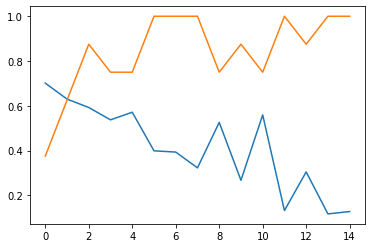

In [342]:
#判斷過度訓練(交叉點)

#print(historyCNN.history.keys())
#print(list(historyCNN.history.values())[0])
#print(list(historyCNN.history.values())[1])
plt.plot(list(historyCNN.history.values())[0])
plt.plot(list(historyCNN.history.values())[1])


# CNN測試

In [343]:
#測試數據

import numpy as np
import pandas as pd 
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220715SinWaveTest/test1'
path = os.path.join(train_dir)
#os.listdir(path)
X_test = []
id_line = []
def create_test1_data(path):
  for p in os.listdir(path):
    id_line.append(p.split(".")[0])
    img_array = np.load(os.path.join(path,p))
    #print(img_array.shape)
    X_test.append(img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1, 2700, 1)
#X_test = X_test/255
predictions = CNN.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':id_line, '判斷':predicted_val})
print(submission_df)
print('0=弱訊號;1=強訊號')


     id  判斷
0    T9   1
1    T8   0
2    T7   0
3    T6   0
4    T5   0
5    T2   0
6    T1   1
7   T14   0
8   T13   0
9   T10   0
10  T12   0
11  T11   0
0=弱訊號;1=強訊號


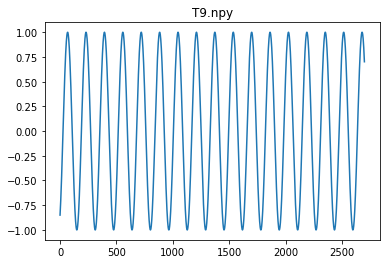

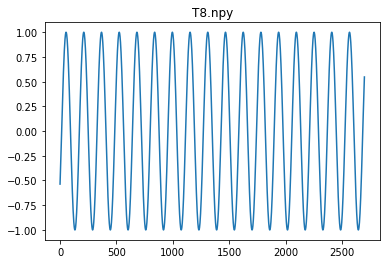

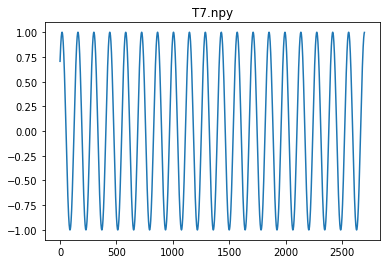

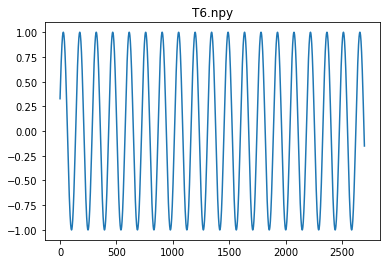

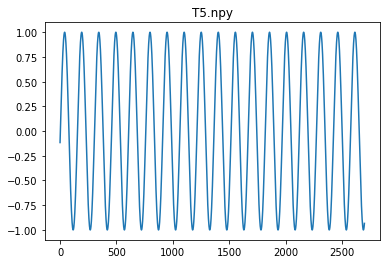

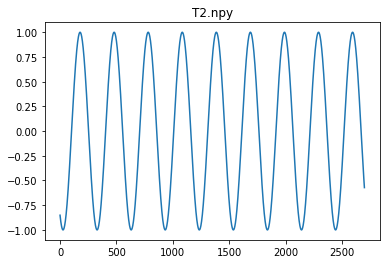

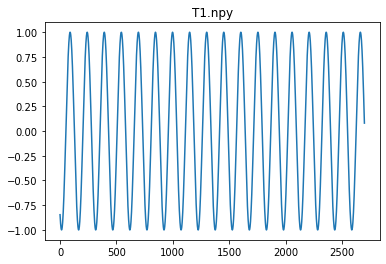

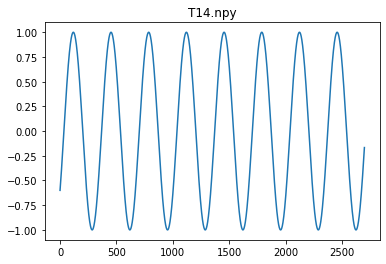

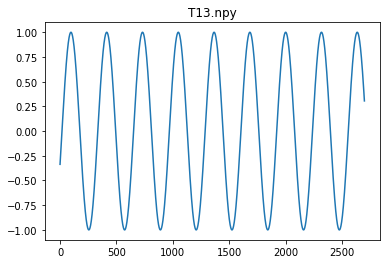

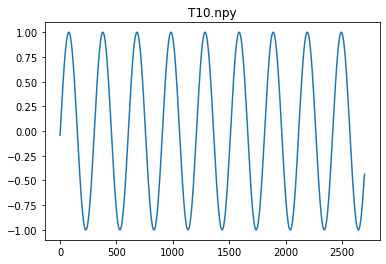

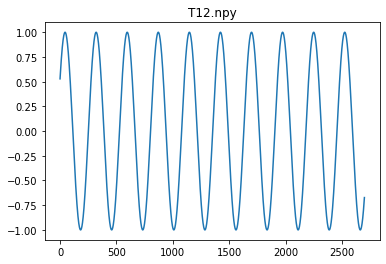

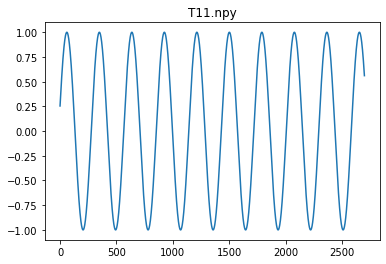

In [337]:
from numpy.lib.type_check import imag
#讀取測試用資料
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/20220715SinWaveTest/test1'
path = os.path.join(train_dir)
id_line = []
for p in os.listdir(path):
  id_line.append(p.split(".")[0])
  img = np.load(os.path.join(path,p))
  #print(img.shape)
  plt.plot(img.T)
  plt.title(p)
  plt.show()

# CNN輸出預測精確度之方法

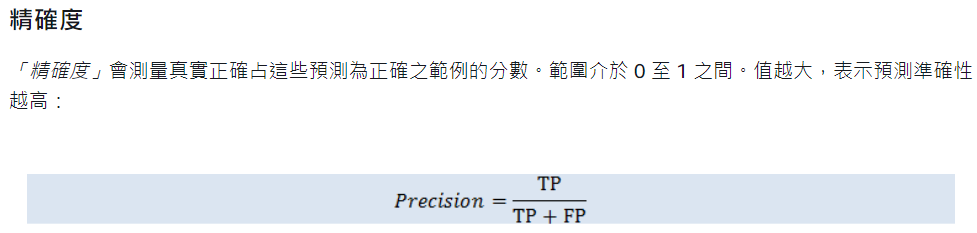